In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import time

In [6]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


<Axes: >

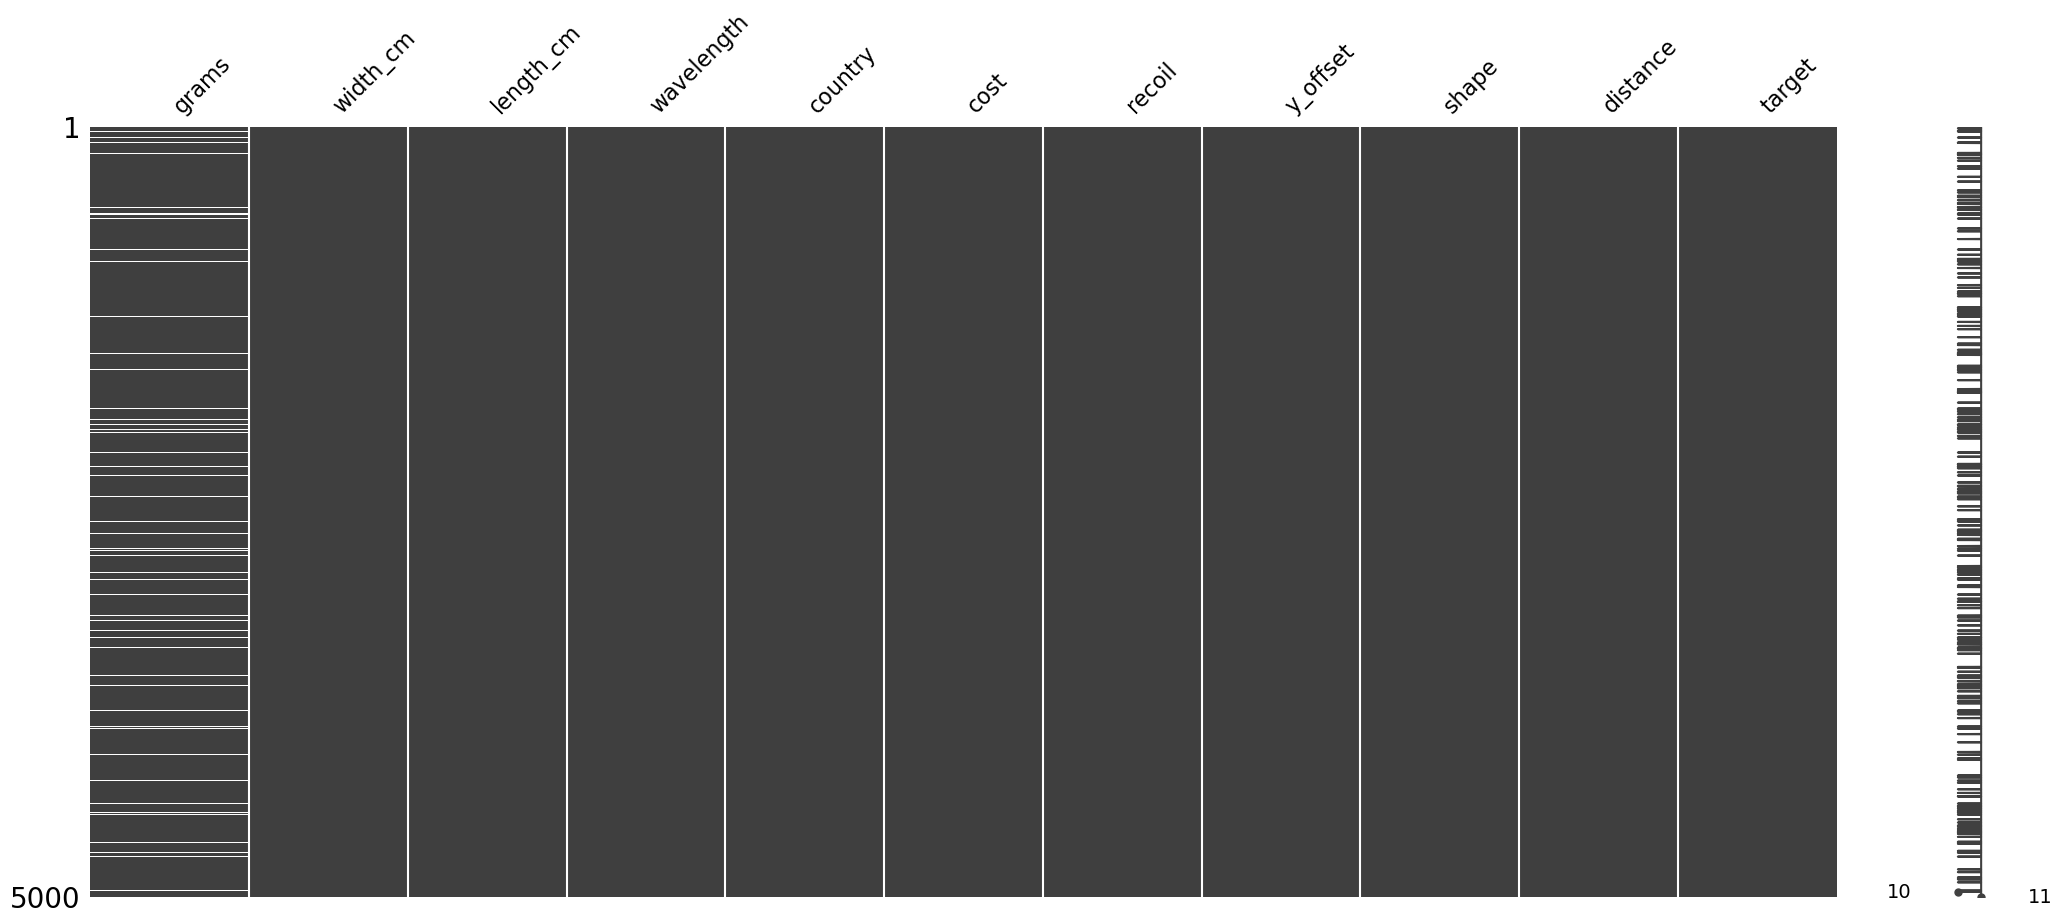

In [7]:
msno.matrix(csv.sample(5000))

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


<Axes: >

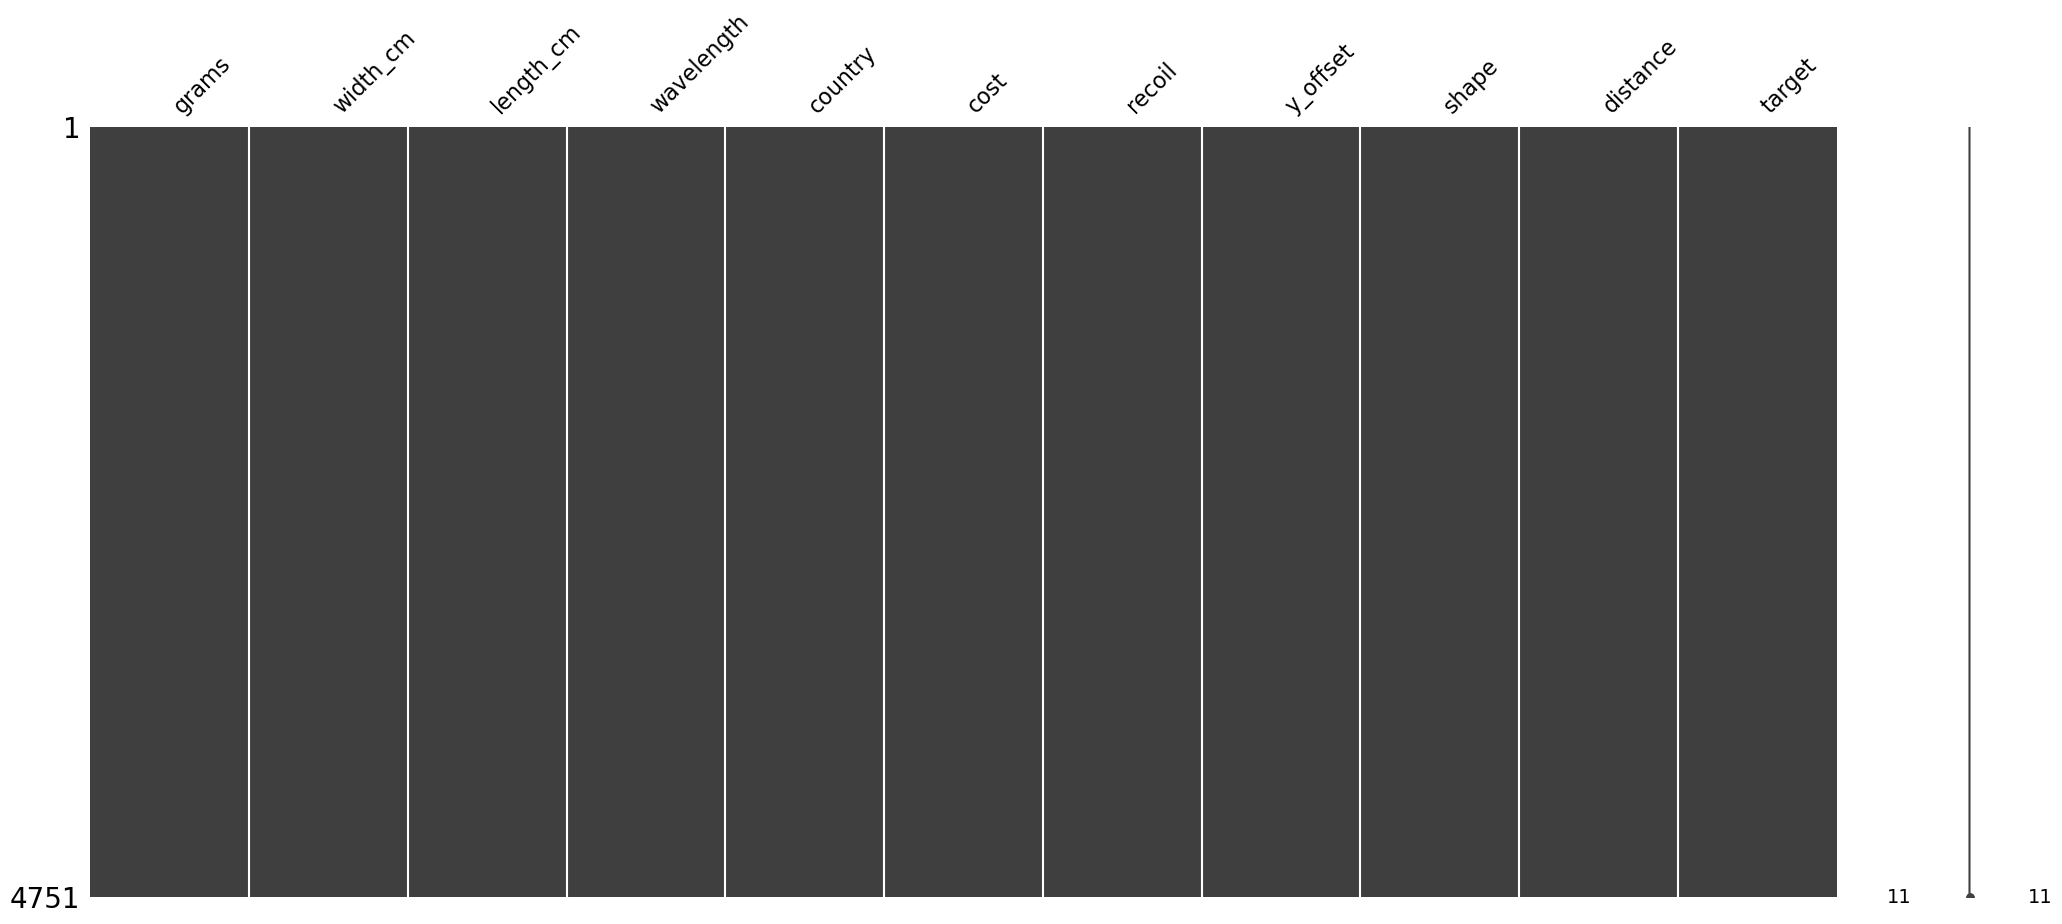

In [10]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
msno.matrix(csv3.sample(4751))

In [11]:
X = csv3.iloc[:, :-1].values
y = csv3.iloc[:, -1].values

In [12]:
y

array(['widget7', 'widget1', 'widget5', ..., 'widget4', 'widget2',
       'widget8'], dtype=object)

In [15]:
ct = ColumnTransformer(transformers=[
    ('encoder_4', OneHotEncoder(), [4]),
    ('encoder_8', OneHotEncoder(), [8])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 1.0, ..., 19.7, 28.7, 48.41],
       [1.0, 0.0, 1.0, ..., 43.28, -27.19, 39.84],
       [1.0, 0.0, 0.0, ..., 60.54, -72.91, 47.33],
       ...,
       [1.0, 0.0, 1.0, ..., 62.07, 14.78, 34.24],
       [1.0, 0.0, 1.0, ..., 28.24, -102.8, 43.03],
       [1.0, 0.0, 1.0, ..., 73.94, -50.94, 49.93]], dtype=object)

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([6, 0, 4, ..., 3, 1, 7])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train

array([[1.0, 0.0, 1.0, ..., 24.09, 20.39, 42.91],
       [1.0, 0.0, 1.0, ..., 52.39, -20.58, 31.67],
       [1.0, 0.0, 1.0, ..., 75.19, 2.58, 48.71],
       ...,
       [1.0, 0.0, 1.0, ..., 62.84, -108.54, 35.36],
       [1.0, 0.0, 1.0, ..., 67.43, 68.0, 53.91],
       [1.0, 0.0, 1.0, ..., 70.82, -79.58, 52.01]], dtype=object)

In [19]:
X_test

array([[1.0, 0.0, 0.0, ..., 68.76, 45.44, 48.03],
       [1.0, 0.0, 1.0, ..., 25.98, -22.3, 36.48],
       [1.0, 0.0, 1.0, ..., 60.24, -4.77, 45.08],
       ...,
       [1.0, 0.0, 1.0, ..., 52.74, -71.7, 35.12],
       [1.0, 0.0, 1.0, ..., 24.01, -59.64, 45.23],
       [1.0, 0.0, 1.0, ..., 37.16, -127.63, 32.64]], dtype=object)

In [20]:
y_train

array([1, 3, 7, ..., 7, 8, 7])

In [21]:
y_test

array([7, 0, 7, 0, 4, 6, 8, 8, 8, 1, 0, 6, 2, 1, 7, 2, 8, 8, 2, 1, 5, 2,
       2, 6, 6, 1, 5, 6, 8, 0, 6, 3, 4, 2, 1, 3, 2, 6, 6, 6, 6, 8, 3, 4,
       0, 8, 3, 2, 2, 0, 8, 4, 5, 3, 8, 3, 6, 6, 5, 6, 6, 6, 2, 3, 7, 3,
       6, 6, 3, 4, 5, 2, 6, 5, 3, 0, 1, 8, 0, 6, 7, 3, 0, 4, 2, 1, 2, 6,
       1, 4, 2, 5, 8, 2, 5, 0, 8, 1, 0, 2, 6, 7, 3, 8, 6, 8, 5, 6, 8, 7,
       1, 0, 1, 2, 4, 8, 2, 8, 0, 2, 2, 1, 8, 7, 2, 5, 4, 3, 6, 1, 3, 0,
       3, 1, 8, 8, 8, 2, 3, 7, 2, 4, 2, 3, 5, 2, 3, 1, 6, 7, 6, 5, 3, 7,
       3, 0, 3, 8, 5, 5, 4, 2, 5, 2, 6, 8, 5, 8, 3, 4, 5, 2, 1, 2, 7, 6,
       0, 0, 0, 2, 7, 0, 7, 5, 4, 8, 2, 7, 5, 0, 0, 8, 8, 2, 3, 3, 5, 2,
       0, 8, 7, 2, 7, 8, 6, 0, 8, 4, 4, 5, 2, 3, 8, 8, 4, 7, 4, 0, 6, 0,
       1, 6, 1, 3, 3, 2, 1, 8, 2, 5, 7, 3, 1, 8, 7, 5, 7, 1, 1, 0, 5, 0,
       5, 0, 4, 4, 6, 5, 6, 5, 8, 3, 8, 8, 4, 6, 5, 2, 2, 3, 2, 7, 0, 7,
       5, 2, 5, 4, 2, 7, 3, 6, 1, 3, 6, 7, 1, 2, 2, 6, 7, 4, 8, 1, 7, 5,
       1, 3, 7, 8, 1, 1, 6, 4, 2, 2, 2, 5, 8, 7, 1,

In [22]:
#sc = StandardScaler()
#X_train[:, 16:] = sc.fit_transform(X_train[:, 16:])
#X_test[:, 16:] = sc.transform(X_test[:, 16:])

In [23]:
X_train

array([[1.0, 0.0, 1.0, ..., 24.09, 20.39, 42.91],
       [1.0, 0.0, 1.0, ..., 52.39, -20.58, 31.67],
       [1.0, 0.0, 1.0, ..., 75.19, 2.58, 48.71],
       ...,
       [1.0, 0.0, 1.0, ..., 62.84, -108.54, 35.36],
       [1.0, 0.0, 1.0, ..., 67.43, 68.0, 53.91],
       [1.0, 0.0, 1.0, ..., 70.82, -79.58, 52.01]], dtype=object)

In [24]:
X_test

array([[1.0, 0.0, 0.0, ..., 68.76, 45.44, 48.03],
       [1.0, 0.0, 1.0, ..., 25.98, -22.3, 36.48],
       [1.0, 0.0, 1.0, ..., 60.24, -4.77, 45.08],
       ...,
       [1.0, 0.0, 1.0, ..., 52.74, -71.7, 35.12],
       [1.0, 0.0, 1.0, ..., 24.01, -59.64, 45.23],
       [1.0, 0.0, 1.0, ..., 37.16, -127.63, 32.64]], dtype=object)

## Naive Bayes

In [25]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train, y_train)

nb_training_time = time.time() - start_time
print('Training Time:', nb_training_time)
naive=[0.0055, 0.0091, 0.005, 0.006, 0.006]

Training Time: 0.005000114440917969


In [26]:
y_pred = model.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[7, 7],
       [0, 0],
       [7, 7],
       ...,
       [4, 4],
       [6, 6],
       [0, 0]])

Accuracy: 0.9758149316508938


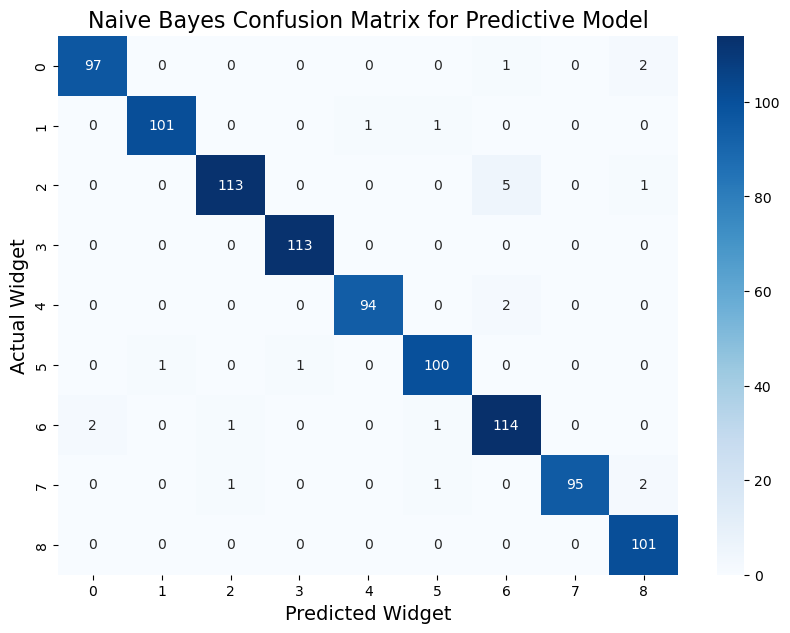

In [33]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.title('Naive Bayes Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

## Random Forest (RandomForestClassifier)

In [28]:
start_time=time.time()
model = RandomForestClassifier(n_estimators = 184, criterion = 'entropy',random_state=1)
model.fit(X_train, y_train)
rf_train_time = [1.6786, 1.7264, 1.7353, 1.7057, 1.71]
rftime=time.time()-start_time
rftime

1.911583423614502

In [29]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


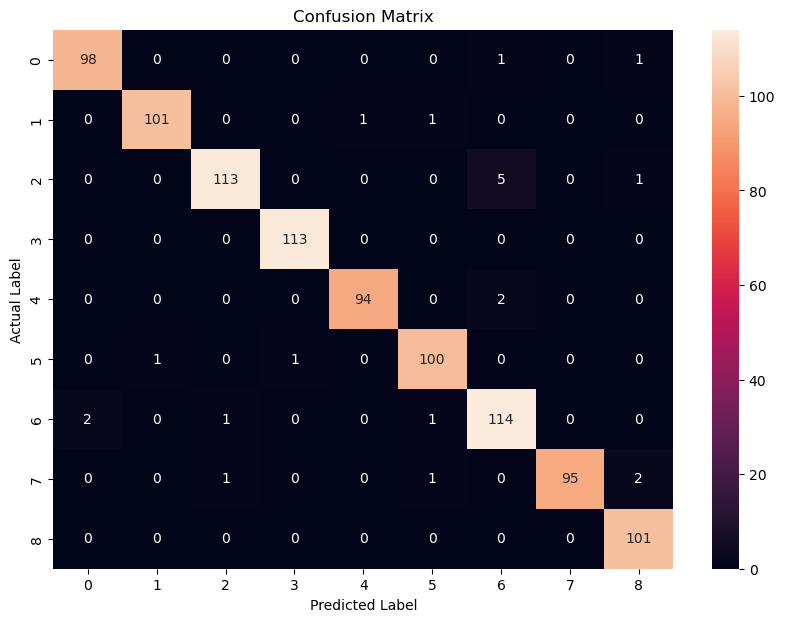

0.9768664563617245

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [31]:
n_estimators_range = range(1, 201)  # Range of number of estimators
scores = []
rftime = [188.3, 185.4, 186, 185.4, 209.7]

# Run the loop over the range of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()
    model = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy',random_state=1)
    model.fit(X_train, y_train)
    rf_training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    


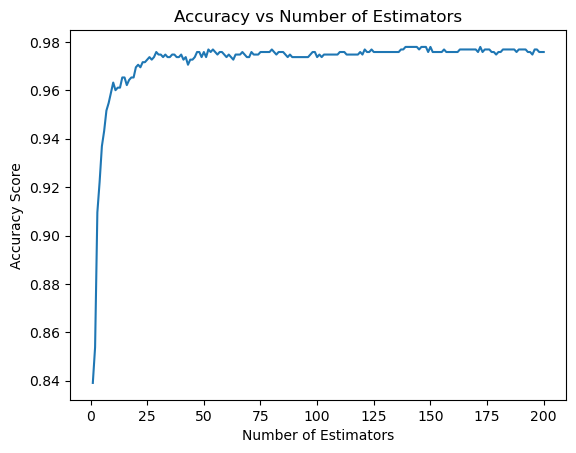

In [32]:
plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Estimators')
plt.show()

In [41]:
#run
rf_grid = []
ir=range(1,5)
rf_grid_store=[857.7435864269127, 822.2561104297638, 878.7302768230438, 792.7622208595276, 783.3219547271729]

for i in ir:
    start_time = time.time()
    parameter = {'n_estimators': range(1, 201)}
    model = RandomForestClassifier(criterion='entropy', random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=parameter, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_n_estimators = grid_search.best_estimator_.get_params()['n_estimators']
    print(f"The best number of estimators is: {best_n_estimators}")

    rf_gridtime = time.time() - start_time
    rf_grid.append(rf_gridtime)
    print("train time:" ,rf_gridtime)

rf_grid

The best number of estimators is: 184
train time: 822.2561104297638
The best number of estimators is: 184
train time: 878.7302768230438
The best number of estimators is: 184
train time: 792.7622208595276
The best number of estimators is: 184
train time: 783.3219547271729


[822.2561104297638, 878.7302768230438, 792.7622208595276, 783.3219547271729]

## Random Forest (Bagging)

In [24]:
start_time=time.time()
decisiontree = DecisionTreeClassifier()
model = BaggingClassifier(decisiontree, n_estimators=198, max_samples=0.8, random_state=1)
model.fit(X_train, y_train)
bagging = [1.2, 1.2, 1.2, 1.2, 1.2] #estimator=41  0.951
bagging2= [5.988, 6.212, 6.0448, 6.0535, 6.0809]     #estimator=198 0.947
bagtime=time.time()-start_time
bagtime

6.065433979034424

In [25]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


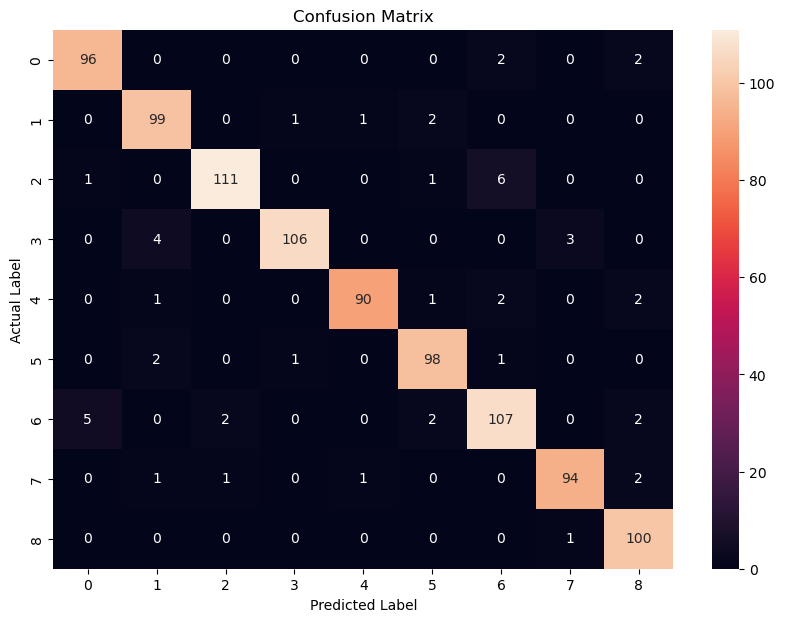

0.9474237644584648

In [26]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [33]:
n_estimators_range = range(1, 101)  # Range of number of estimators
scores = []
rfbegging_time = [168.2, 198.9, 208.2, 168.7, 156.9]

# Run the loop over the range of n_estimators
for n_estimators in n_estimators_range:
    start_time = time.time()

    model = BaggingClassifier(DecisionTreeClassifier(), 
                                     n_estimators=n_estimators, 
                                     max_samples=0.8, 
                                     random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    rf_begging_time = time.time() - start_time
    
rf_begging_time

3.1144275665283203

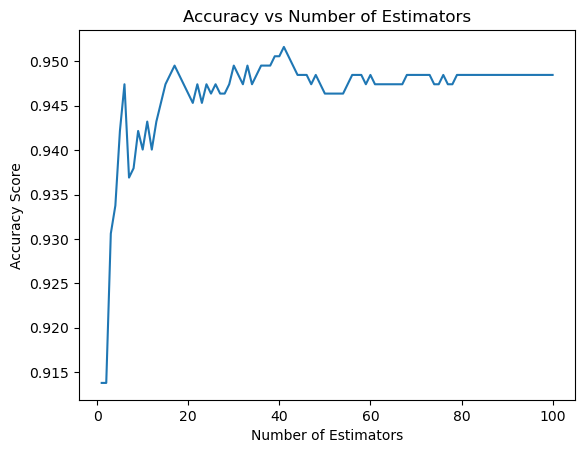

In [34]:
plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Estimators')
plt.show()

In [ ]:
begging_grid=[]
ir=range(1,6)
begging_grid_timestore=[3302.1, 3285.13, 3307.86, 3297.47, 3303.89]

for i in ir:
    start_time = time.time()
    parameter = {'n_estimators': range(1, 201)}
    decisiontree = DecisionTreeClassifier()
    model = BaggingClassifier(decisiontree, max_samples=0.8, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=parameter, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_n_estimators = grid_search.best_estimator_.get_params()['n_estimators']
    print(f"The best number of estimators is: {best_n_estimators}")

    begging_time = time.time() - start_time
    begging_grid.append(begging_time)

begging_grid


## Kernel SVM (rbf)

In [27]:
rbftime_store=[0.31, 0.3, 0.31, 0.29, 0.3]
start_time = time.time()
model = SVC(kernel = 'rbf', random_state = 1, C=1, gamma = 0.0001)
model.fit(X_train, y_train)
rbftime = time.time() - start_time
rbftime

0.29341721534729004

In [28]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


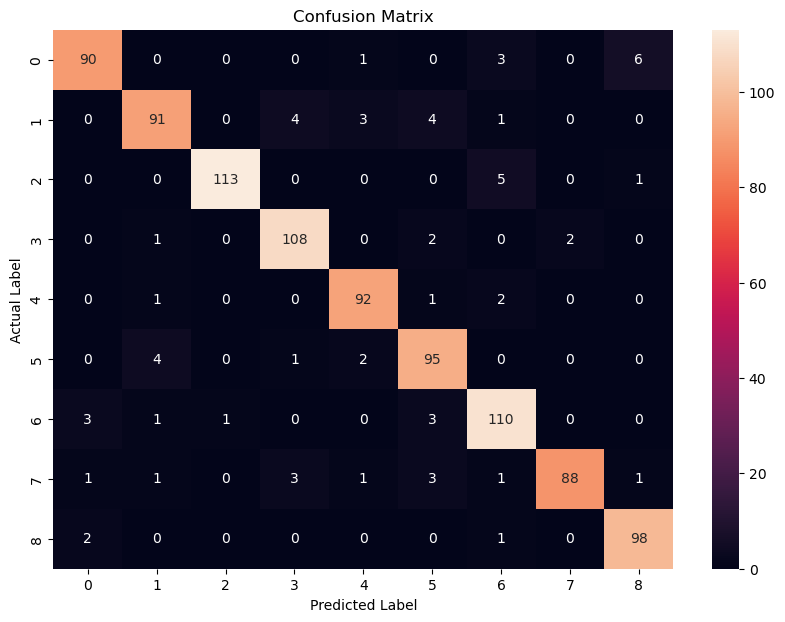

0.9305993690851735

In [30]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [33]:
model = SVC(kernel='rbf',random_state=1)

rbfgridtime_store=[135.31, 151.66, 186.26, 133.48, 133.68]
start_time = time.time()

parameters = {
              'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

rbfgridtime = time.time() - start_time
rbfgridtime

133.6795060634613

In [159]:
gridsearch.best_params_

{'C': 1, 'gamma': 0.0001}

## Kernel SVM (Poly)

In [36]:
polytime=[]
polytime_store=[0.18528461456298828, 0.17017412185668945, 0.1708517074584961, 0.18305420875549316, 0.18439006805419922]
ir=range(1,6)

for i in ir:
    start_time = time.time()

    model = SVC( kernel='poly', C=100, random_state = 1)
    model.fit(X_train, y_train)

    poly_time = time.time() - start_time
    polytime.append(poly_time)
polytime

[0.07997298240661621,
 0.09067153930664062,
 0.08160567283630371,
 0.07898092269897461,
 0.07969117164611816]

In [37]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


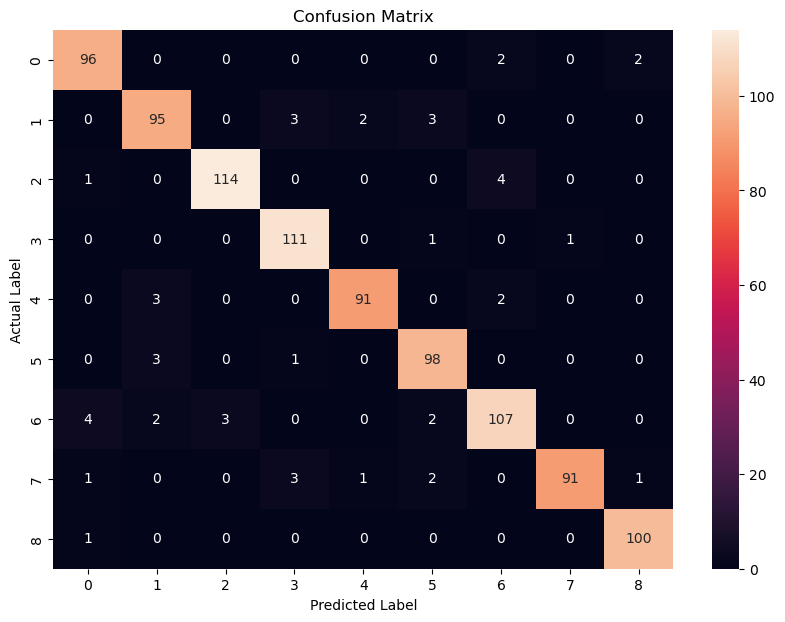

0.9495268138801262

In [38]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)


In [39]:
model = SVC(kernel='poly',random_state=1)
polygridtime=[]
polygridtimestore=[2.4582903385162354, 2.4056906700134277, 2.3627099990844727, 2.379136800765991, 2.37773060798645]
ir=range(1, 6)

for i in ir:
    start_time=time.time()

    parameters = {
                'C': [0.1, 1, 10, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)

    poly_grid_time = time.time() - start_time
    polygridtime.append(poly_grid_time)
    print("train time:", poly_grid_time)

polygridtime
    

train time: 2.9822678565979004
train time: 2.3632359504699707
train time: 2.4273440837860107
train time: 2.3807291984558105
train time: 2.343770980834961


[2.9822678565979004,
 2.3632359504699707,
 2.4273440837860107,
 2.3807291984558105,
 2.343770980834961]

In [35]:
gridsearch.best_params_

{'C': 100}

## Kernel SVM (linear)

In [43]:
start_time=time.time()
model = SVC(C=1, kernel='linear', random_state = 1)
model.fit(X_train, y_train)
linear = [2.9532, 2.9895, 2.9716, 2.9498, 2.9568]
litime=time.time()-start_time
litime

2.9063327312469482

In [41]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


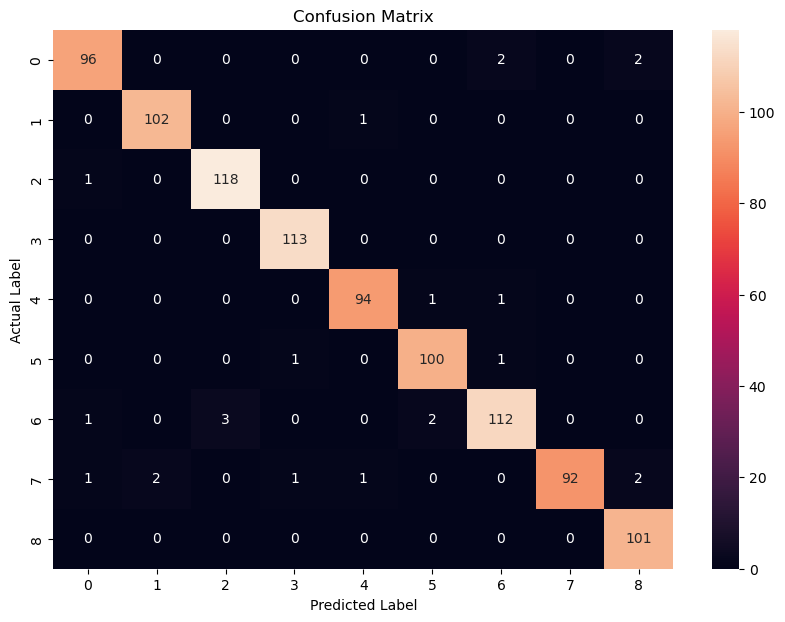

0.9758149316508938

In [42]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [57]:
model = SVC(kernel='linear',random_state=1)

parameters = {
              'C': [0.1, 1, 10, 100, 1000],
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

linear_grid=[136.2, 134.9, 118.8, 126.4, 133.8]

In [31]:
gridsearch.best_params_

{'C': 1}